In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
tf.__version__

In [ ]:
from google.colab import drive
drive_path = '/content/gdrive/'
drive.mount(drive_path) 

In [ ]:
!find gdrive/MyDrive/Eluvio_DS_Challenge.csv

In [ ]:
df = pd.read_csv('gdrive/MyDrive/Eluvio_DS_Challenge.csv', encoding="utf-8-sig")
df.tail()

# Nov razdelek

In [ ]:
df.dtypes

In [6]:
#df = df[:50]

In [7]:
df.columns

Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'category'],
      dtype='object')

In [8]:
df['time_created'] = df['time_created'].apply(lambda x: df.time_created.max()-x)

In [9]:
df.tail()

time_created date_created  up_votes  ...  over_18        author   category
45         58131   2008-02-05         4  ...    False         key95  worldnews
46         52086   2008-02-05         0  ...    False  mlawless1138  worldnews
47         44264   2008-02-06         0  ...    False     Moldavite  worldnews
48          4810   2008-02-06         5  ...    False      dizzle67  worldnews
49             0   2008-02-06         7  ...    False      dizzle67  worldnews

[5 rows x 8 columns]

In [10]:
df.isnull().sum()

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
category        0
dtype: int64

In [11]:
##  Voting

In [12]:
def ratio(x,y):
  if x == y:
    return 0
  return x/(x-y)


In [13]:
df['likeable'] = df.apply(lambda x: x['up_votes']>x['down_votes'], axis = 1)
df['vote_ratio'] = df.apply(lambda x: ratio(x['up_votes'], x['down_votes']), axis=1)

In [14]:
## Over 18 and category and author

In [15]:
df['over_18'] = df['over_18'].apply(lambda x: x == 'True')
df.drop('category', inplace=True, axis = 1)

In [16]:
df.author.nunique()

16

In [17]:
## pogrunti če authorji vključujejo kake muslim - , nekaj kar namiguje, mogoče prideš do score-a kuk threating so

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def transform(x):
  return le.fit_transform(x)

In [19]:
df.tail()

time_created date_created  up_votes  ...        author likeable  vote_ratio
45         58131   2008-02-05         4  ...         key95     True         1.0
46         52086   2008-02-05         0  ...  mlawless1138    False         0.0
47         44264   2008-02-06         0  ...     Moldavite    False         0.0
48          4810   2008-02-06         5  ...      dizzle67     True         1.0
49             0   2008-02-06         7  ...      dizzle67     True         1.0

[5 rows x 9 columns]

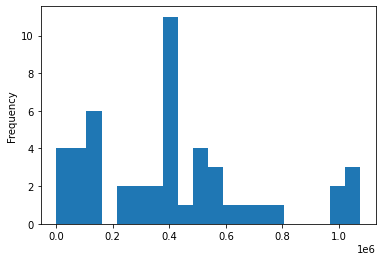

In [46]:
df.time_created.plot.hist(bins = 20)

In [20]:
## Date

In [21]:
cur_year = 2021
cur_month = 4
cur_day = 8

## returns the number of days since then upto now, that number is normalized later on to avoid disturbing the gradient
def date(x):
  a,b,c = x.split('-')
  y = (cur_year-int(a))*365
  m = (cur_month-int(b))*30
  d = cur_day-int(c)
  return y+m+d
  

In [22]:
date('2016-11-22')

1601

In [23]:
df['date_created'] = df['date_created'].apply(lambda x: date(x))
df['date_created'] = df['date_created']/df['date_created'].max()

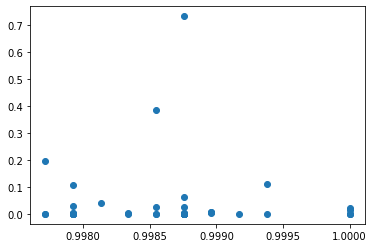

In [24]:
## Title

In [25]:
def titlesample(index):
  return df.at[index,'title']

In [26]:
titlesample(22)

'Merkel to meet leaders of Turkey, United Arab Emirates '

In [27]:
#https://www.kaggle.com/javaidnabi/toxic-comment-classification-using-bert/
#https://towardsdatascience.com/building-a-multi-label-text-classifier-using-bert-and-tensorflow-f188e0ecdc5d
#https://medium.com/huggingface/multi-label-text-classification-using-bert-the-mighty-transformer-69714fa3fb3d

In [28]:
## Bert for toxicity and sarcasm + connectedness with author, vote_ratio = label

In [29]:
!pip3 install detoxify

In [30]:
from detoxify import Detoxify
def predict_bert(x):
   return Detoxify('original').predict(x)

In [31]:
predict_bert(titlesample(47))

{'identity_hate': 0.00016045016,
 'insult': 0.0002038069,
 'obscene': 0.00018955162,
 'severe_toxicity': 9.778969e-05,
 'threat': 0.00011089982,
 'toxicity': 0.0014157534}

In [32]:
df['metrics'] = df['title'].apply(lambda x: sum(predict_bert(x).values()))

In [33]:
df.head()

time_created  date_created  up_votes  ...  likeable vote_ratio   metrics
0       1075960           1.0         3  ...      True        1.0  0.041807
1       1075931           1.0         2  ...      True        1.0  0.006787
2       1075483           1.0         3  ...      True        1.0  0.001649
3       1074716           1.0         1  ...      True        1.0  0.002031
4       1033286           1.0         4  ...      True        1.0  0.025051

[5 rows x 10 columns]

# Nov razdelek

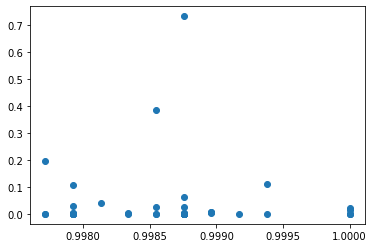

In [49]:
plt.scatter(df.date_created, df.metrics)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


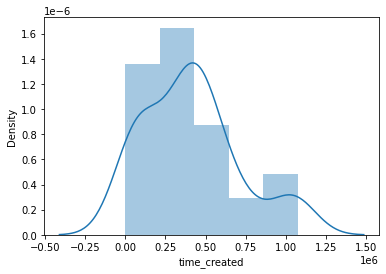

In [53]:
import seaborn as sns
sns.distplot(df.time_created)

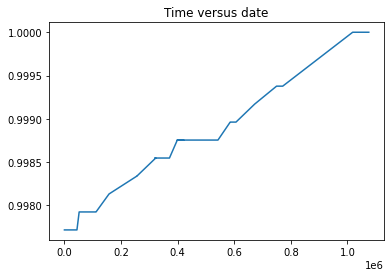

In [56]:
plt.plot(df.time_created, df.date_created)
plt.title('Time versus date')
plt.show()

In [34]:
labels = df['vote_ratio']
df.drop(labels, inplace = True, axis = 0)

In [35]:
df.drop('likeable', inplace = True, axis = 1)

In [36]:
df.head()

time_created  date_created  up_votes  ...          author vote_ratio   metrics
2       1075483           1.0         3  ...           polar        1.0  0.001649
3       1074716           1.0         1  ...         fadi420        1.0  0.002031
4       1033286           1.0         4  ...        mhermans        1.0  0.025051
5       1020117           1.0        15  ...  Armagedonovich        1.0  0.015404
6       1018568           1.0         5  ...         Clythos        1.0  0.001740

[5 rows x 9 columns]

In [37]:
df.shape

(48, 9)

# Nov razdelek

In [38]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import * 

act = tf.nn.leaky_relu

model = Sequential([
                    Dense(128, activation=act),
                    Dropout(0.1),
                    Dense(64, activation=act),
                    Dropout(0.1),
                    Dense(16, activation = act),
                    Dense(1)
])

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy'])
model.build(df.shape)

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (48, 128)                 1280      
_________________________________________________________________
dropout (Dropout)            (48, 128)                 0         
_________________________________________________________________
dense_1 (Dense)              (48, 64)                  8256      
_________________________________________________________________
dropout_1 (Dropout)          (48, 64)                  0         
_________________________________________________________________
dense_2 (Dense)              (48, 16)                  1040      
_________________________________________________________________
dense_3 (Dense)              (48, 1)                   17        
Total params: 10,593
Trainable params: 10,593
Non-trainable params: 0
____________________________________________________

In [40]:
filepath = 'models/'

In [41]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

e = EarlyStopping(monitor = 'accuracy', patience = 2)
rl = ReduceLROnPlateau(monitor = 'val_loss', patience = 1, mode = 'auto')
check = ModelCheckpoint(filepath, save_best_only = True, save_weights_only = True)

cs = [e, rl, check]

history = model.fit(df,label, validation_split=0.15, epochs = 15, batch_size=32, callbacks=cs, shuffle=True, verbose = 1)

NameError: ignored

In [ ]:
#probably use pyspark

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext
from pyspark.ml.feature import StringIndexer, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import rand
from pyspark.mllib.evaluation import MulticlassMetrics

In [ ]:
from pyspark.ml.feature import OneHotEncoder

In [ ]:
from pyspark.sql import SparkSession
sc = SparkSession.builder.getOrCreate()

sc.sparkContext.setLogLevel("WARN")
print(sc)


In [ ]:
df = sc.read.option("header", "true").csv(
    '/content/gdrive/MyDrive/Eluvio_DS_Challenge.csv'
)

In [ ]:
display(df)

In [ ]:
df = df.drop('category')

In [ ]:
def select_features_to_scale(df=df, lower_skew=-2, upper_skew=2, dtypes='int32', drop_cols=['']):
    
    # Empty Selected Feature List for Output
    selected_features = []
    
    # Select Features to Scale based on Inputs ('in32' type, drop 'ID' columns or others, skew bounds)
    feature_list = list(df.toPandas().select_dtypes(include=[dtypes]).columns.drop(drop_cols))
    
    # Loop through 'feature_list' to select features based on Kurtosis / Skew
    for feature in feature_list:

        if df.toPandas()[feature].kurtosis() < -2 or df.toPandas()[feature].kurtosis() > 2:
            
            selected_features.append(feature)
    
    # Return feature list to scale
    return selected_features

In [ ]:
cat_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
num_features = ['age','balance','duration','campaign','pdays','previous']
label = 'deposit'

# Pipeline Stages List
stages = []

# Loop for StringIndexer and OHE for Categorical Variables
for features in cat_features:
    
    # Index Categorical Features
    string_indexer = StringIndexer(inputCol=features, outputCol=features + "_index")
    
    # One Hot Encode Categorical Features
    encoder = OneHotEncoder(inputCols=[string_indexer.getOutputCol()],
                                     outputCols=[features + "_class_vec"])
    # Append Pipeline Stages
    stages += [string_indexer, encoder]
    
# Index Label Feature
label_str_index =  StringIndexer(inputCol=label, outputCol="label_index")

# Scale Feature: Select the Features to Scale using helper 'select_features_to_scale' function above and Standardize 
unscaled_features = select_features_to_scale(df=df, lower_skew=-2, upper_skew=2, dtypes='int32', drop_cols=['id'])

unscaled_assembler = VectorAssembler(inputCols=unscaled_features, outputCol="unscaled_features")
scaler = StandardScaler(inputCol="unscaled_features", outputCol="scaled_features")

stages += [unscaled_assembler, scaler]

# Create list of Numeric Features that Are Not Being Scaled
num_unscaled_diff_list = list(set(num_features) - set(unscaled_features))

# Assemble or Concat the Categorical Features and Numeric Features
assembler_inputs = [feature + "_class_vec" for feature in cat_features] + num_unscaled_diff_list

assembler = VectorAssembler(inputCols=assembler_inputs, outputCol="assembled_inputs") 

stages += [label_str_index, assembler]

# Assemble Final Training Data of Scaled, Numeric, and Categorical Engineered Features
assembler_final = VectorAssembler(inputCols=["scaled_features","assembled_inputs"], outputCol="features")

stages += [assembler_final]

In [ ]:
stages

In [ ]:
pipeline = Pipeline(stages = stages)
pipeline_model = pipeline.fit(df)
df_transform = pipeline_model.transform(df)

In [ ]:
from elephas.ml_model import ElephasEstimator

In [ ]:
estimator = ElephasEstimator()
estimator.setFeaturesCol("features")
estimator.setLabelCol("label_index")
estimator.set_keras_model_config(model.to_yaml())
estimator.set_categorical_labels(True)
estimator.set_num_workers(1)
estimator.set_epochs(25) 
estimator.set_batch_size(64)
estimator.set_verbosity(1)
estimator.set_validation_split(0.10)
estimator.set_mode("synchronous")
estimator.set_loss("binary_crossentropy")
estimator.set_metrics(['acc'])

In [ ]:
dl_pipeline = Pipeline(stages=[estimator])

In [ ]:
def dl_pipeline_fit_score_results(dl_pipeline=dl_pipeline,
                                  train_data=df,
                                  test_data=test_data,
                                  label='label_index'):
    
    fit_dl_pipeline = dl_pipeline.fit(train_data)
    pred_train = fit_dl_pipeline.transform(train_data)
    pred_test = fit_dl_pipeline.transform(test_data)
    
    pnl_train = pred_train.select(label, "prediction")
    pnl_test = pred_test.select(label, "prediction")
    
    pred_and_label_train = pnl_train.rdd.map(lambda row: (row[label], row['prediction']))
    pred_and_label_test = pnl_test.rdd.map(lambda row: (row[label], row['prediction']))
    
    metrics_train = MulticlassMetrics(pred_and_label_train)
    metrics_test = MulticlassMetrics(pred_and_label_test)
    
    print("Training Data Accuracy: {}".format(round(metrics_train.precision(),4)))
    print("Training Data Confusion Matrix")
    display(pnl_train.crosstab('label_index', 'prediction').toPandas())
    
    print("\nTest Data Accuracy: {}".format(round(metrics_test.precision(),4)))
    print("Test Data Confusion Matrix")
    display(pnl_test.crosstab('label_index', 'prediction').toPandas())

In [ ]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([8, 64]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.3))
HP_LEARNING_RATE= hp.HParam('learning_rate', hp.Discrete([0.001, 0.0005, 0.0001]))
HP_OPTIMIZER=hp.HParam('optimizer', hp.Discrete(['adam', 'sgd', 'rmsprop']))

METRIC_ACCURACY = 'RootMeanSquaredError'
log_dir ='\\logs\\fit\\' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
with tf.summary.create_file_writer(log_dir).as_default():
    hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT,  HP_OPTIMIZER, HP_LEARNING_RATE],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Rmse')],
    )

In [ ]:

def create_model(hparams):
    model = tf.keras.Sequential([
        Dense(512,input_shape=[5]),
        Dense(128,activation='relu',kernel_regularizer=l1(1e-4)),
        BatchNormalization(),
        Dense(128,activation='relu'),
        Dropout(hparams[HP_DROPOUT]),
        Dense(64, activation='relu'),
        Dropout(hparams[HP_DROPOUT]),
        Dense(hparams[HP_NUM_UNITS], activation='relu'),
        Dense(16,activation='relu'),    
        Dense(1)
    ], name = 'rentals_model')
    optimizer = hparams[HP_OPTIMIZER]
    learning_rate = hparams[HP_LEARNING_RATE]
    
    if optimizer == "adam":
        optimizer = tf.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "sgd":
        optimizer = tf.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer=='rmsprop':
        optimizer = tf.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Not an optimizer name: %r" % (optimizer_name,))
    
    model.compile(optimizer = optimizer, loss = Huber(), metrics=['RootMeanSquaredError'])
    return model
def train_and_evaluate(model, hparams):
    
    hp_tuning = hp.KerasCallback(log_dir, hparams),
    cbs = [tensorboard, hp_tuning]
    
    history = model.fit(x_train, y_train,validation_split=0.1,epochs=100, shuffle = True, callbacks = cbs,verbose=2)
    _, rmse = model.evaluate(x_test,y_test)
    return rmse, history

In [ ]:
## create a model that returns an evaluation so we can run hp tuning. 

In [ ]:
model = create_model(hparams)
model.summary()

In [ ]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)
        model = create_model(hparams)
        accuracy, history = train_and_evaluate(model, hparams)
        #accuracy= tf.reshape(tf.convert_to_tensor(accuracy), []).numpy()
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
    return history
    

In [ ]:
session_num = 0
for num_units in HP_NUM_UNITS.domain.values:
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
        for optimizer in HP_OPTIMIZER.domain.values:
            for learning_rate in HP_LEARNING_RATE.domain.values:
                hparams = {
                  HP_NUM_UNITS: num_units,
                  HP_DROPOUT: dropout_rate,
                  HP_OPTIMIZER: optimizer,
                  HP_LEARNING_RATE: learning_rate,
              }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            history = run('logs/hparam_tuning/' + run_name, hparams)
            session_num += 1

In [ ]:
hparams.values()

In [ ]:
### run the model again with the best hyperparameters. 
model = create_model(hparams)
cs = [reduce_lr, checkpoint_best, tensorboard]
history = model.fit(x_train, y_train, validation_split = 0.1 ,callbacks=cs, epochs=500,shuffle = True, verbose=2)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()